# Energy Usage Data Explorer

This notebook provides a starting point for exploring residential energy usage data from DTE Energy. The dataset includes hourly electricity usage and daily gas consumption.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the Data

In [2]:
energy_df = pd.read_csv('data/energy_usage.csv', parse_dates=['Day'])
gas_df = pd.read_csv('data/gas_usage.csv', parse_dates=['Day'])

## About the Data

### Electricity (`energy_df`)
- **Day**: Date of measurement
- **Hour of Day**: Hour (0-23)
- **Hourly Total**: Electricity used that hour (kWh)
- **Daily Total**: Total electricity for the day (kWh)
- **Unit of Measurement**: kWh

### Gas (`gas_df`)
- **Day**: Date of measurement
- **Daily Total**: Gas used that day (CCF)
- **Estimated Read**: Whether the reading was estimated
- **Unit of Measurement**: CCF (hundred cubic feet)

In [3]:
energy_df.head()

,Day,Hour of Day,Hourly Total,Daily Total,Unit of Measurement
0,2024-11-17,12:00 AM,0.658,19.437,kWh
1,2024-11-17,1:00 AM,0.609,19.437,kWh
2,2024-11-17,2:00 AM,0.566,19.437,kWh
3,2024-11-17,3:00 AM,0.705,19.437,kWh
4,2024-11-17,4:00 AM,0.656,19.437,kWh


In [4]:
gas_df.head()

,Day,Daily Total,Estimated Read,Unit of Measurement
0,2024-11-17,2.02,No,CCF
1,2024-11-18,1.80,No,CCF
2,2024-11-19,1.10,No,CCF
3,2024-11-20,2.72,No,CCF
4,2024-11-21,3.91,Yes,CCF


## Data Overview

In [5]:
print(f"Electricity data: {len(energy_df):,} hourly readings")
print(f"  Date range: {energy_df['Day'].min().date()} to {energy_df['Day'].max().date()}")
print(f"\nGas data: {len(gas_df):,} daily readings")
print(f"  Date range: {gas_df['Day'].min().date()} to {gas_df['Day'].max().date()}")

Electricity data: 9,840 hourly readings
  Date range: 2024-11-17 to 2025-12-31

Gas data: 410 daily readings
  Date range: 2024-11-17 to 2025-12-31


## Ideas for Exploration

Here are some questions you might explore with this data:

1. **Seasonal patterns**: How does usage change across months?
2. **Daily patterns**: What hours have peak electricity usage?
3. **Weather correlation**: Does gas usage correlate with temperature? (You'd need to pull weather data)
4. **Year-over-year comparison**: How does December 2024 compare to December 2025?
5. **Weekend vs weekday**: Are usage patterns different on weekends?

## Quick Example: Monthly Totals

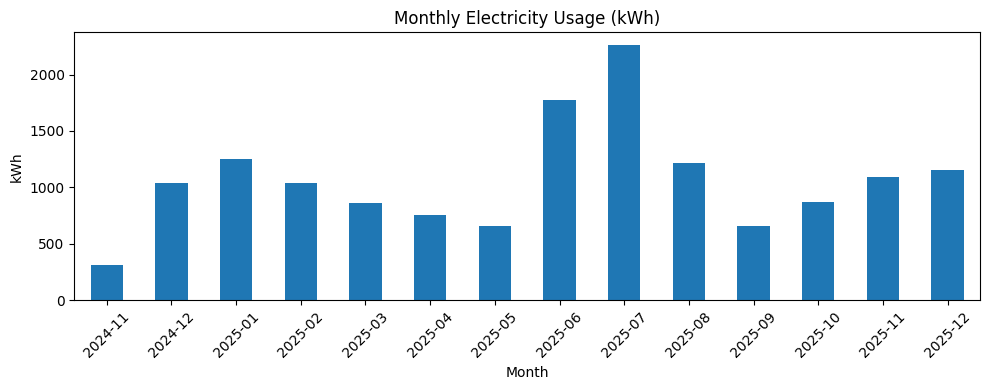

In [6]:
# Get daily totals (one row per day)
daily_energy = energy_df.groupby('Day')['Daily Total'].first().reset_index()
daily_energy['Month'] = daily_energy['Day'].dt.to_period('M')

monthly_kwh = daily_energy.groupby('Month')['Daily Total'].sum()
monthly_kwh.plot(kind='bar', figsize=(10, 4), title='Monthly Electricity Usage (kWh)')
plt.ylabel('kWh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Your Turn!

Add cells below to explore the data further.